# Phase  3  project - Machine Learning!

Name:  Winfred Kinya Bundi.


Student pace:  Full time Hybrid.


Scheduled project review date/time: 07/06/2024.


Instructor name: Mwikali Maryanne.


Blog post URL: git@github.com:winnycodegurl/MachineLearningprojectphase3.git



# INTRODUCTION.

Telecommunication companies face significant challenges in reducing customer churn, which can lead to substantial revenue losses. Customer churn occurs when customers discontinue their services, and understanding the factors that contribute to this behavior is crucial for maintaining profitability and growth. This project aims to analyze customer data to identify predictable patterns in customer churn. By developing predictive models and segmenting customers based on their behavior, the goal is to provide actionable insights that optimize service quality, enhance customer satisfaction, and improve operational efficiency. These insights will help telecom companies make strategic decisions to drive performance improvements and foster customer loyalty.








# BUSINESS UNDERSTANDING
Understanding the factors that contribute to churn can help telecommunication  companies stakeholders'  devise strategies to retain customers and reduce revenue loss.The primary stakeholders are the company's executive team, customer service managers, and operations management. Secondary stakeholders include marketing and product development teams interested in enhancing customer satisfaction and loyalty.Key study factors include:

1.Account Length: Understanding the duration of customer accounts can help identify patterns where customers are more likely to churn. For example, if churn is more prevalent among newer customers, the company might need to improve onboarding processes or initial customer support.

2.Usage Patterns: Analyzing total day, evening, and night minutes can reveal insights into how customer usage correlates with churn. Customers with low usage might be dissatisfied with service quality or pricing and could be more prone to churn. Tailoring services or offering usage-based incentives might help retain these customers.

3.Service Plans: The presence of international and voicemail plans can provide insights into customer preferences and needs. Customers with specific service plans might have different churn behaviors. For example, those without international plans might churn if they find better offers elsewhere. Understanding these patterns can help in customizing service plans to better meet customer needs.

4.Customer Interactions: Customer service calls are a critical indicator of customer satisfaction. A high number of customer service interactions might indicate unresolved issues or dissatisfaction, leading to churn. By analyzing the nature and frequency of these calls, companies can identify common problems and address them proactively.


Telecommunications companies can develop targeted interventions to improve customer retention. Proactive measures might include personalized communication, tailored service plans, better customer support, and special incentives for at-risk customers

# PROBLEM STATEMENT.

Lecom Limited, a medium-sized telecommunication company, strives to become the top-performing company in its state.This project aims to analyze Lecom Limited's customer data to identify predictable patterns in customer churn. By developing predictive models and segmenting customers based on their behavior, we will provide actionable insights to optimize service quality, enhance customer satisfaction, and improve operational efficiency. The ultimate objective is to help Lecom Limited make strategic decisions that drive performance improvements and foster customer loyalty.


# OBJECTIVES.
1.Identify the key indicators of customer churn using the given data.

2.Analyze the factors leading to frequent customer service calls and provide recommendations to reduce call volumes and improve service efficiency.

3.Segment customers based on their service usage patterns, satisfaction levels, and likelihood of churn to target specific interventions.

4.Develop predictive models to forecast customer churn, frequent customer service calls, and overall customer satisfaction.Evaluate the models to check on the best performing model using variious metrics such as accuary,ROC and AUC curves.

5.Provide Actionable Recommendations to business stakeholders.


# DATA UNDERSTANDING
The dataset consists of telecommunications customer data across various attributes:

state: The state where the customer is located.

account length: The duration (in days) that the customer has been with the service.

area code: The area code of the customer's phone number.

phone number: The customer's phone number.

international plan: Whether the customer has an international calling plan (yes/no).

voice mail plan: Whether the customer has a voice mail plan (yes/no).

number vmail messages: The number of voice mail messages the customer has.

total day minutes: The total number of minutes the customer has used during the day.

total day calls: The total number of calls the customer has made during the day.

total day charge: The total charge for the day minutes.

total eve minutes: The total number of minutes the customer has used in the evening.

total eve calls: The total number of calls the customer has made in the evening.

total eve charge: The total charge for the evening minutes.

total night minutes: The total number of minutes the customer has used at night.

total night calls: The total number of calls the customer has made at night.

total night charge: The total charge for the night minutes.

total intl minutes: The total number of international minutes the customer has used.

total intl calls: The total number of international calls the customer has made.

total intl charge: The total charge for the international minutes.

customer service calls: The number of calls the customer has made to customer service.

churn: Whether the customer has churned (TRUE/FALSE).

TABLE OF CONTENTS


1.Data Preparation

2.Data cleaning

3.Exploratory data analysis

4.Statistical Analysis

5.Modelling

6.Evaluation

7.Conclusion

8.Reccomendations

# 1. DATA PREPARATION

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import  MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from math import log2
from sklearn.pipeline import Pipeline
from pandas.api.types import is_numeric_dtype






In [73]:
# Load the dataset to inspect the initial state of the data
import pandas as pd            

class churmdata:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
    
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
    
    def display_info(self):
        self.data.info()

    
    def display_head(self,n=5):
        self.data.head
        print(self.data.head(n))
    

    def display_statistics(self):
        self.data.describe()
        print(self.data.describe())

    def check_missing_data(self):
        
        if self.data is not None:
            print("Missing Data Check:")
            missing_data = self.data.isnull().sum()
            print(missing_data[missing_data > 0])
        else:
            print("No missing data") 

    def check_duplicates(self):
        
        if self.data is not None:
            print("Duplicate Rows Check:")
            duplicates = self.data.duplicated().sum()
            print(f"Number of duplicate rows: {duplicates}")
        else:
            print("No duplicate rows")

             
    def display_statistics(self):
    
     summary_columns = [
        'account length', 'number vmail messages', 'total day minutes', 
        'total day calls', 'total day charge', 'total eve minutes', 
        'total eve calls', 'total eve charge', 'total night minutes', 
        'total night calls', 'total night charge', 'total intl minutes', 
        'total intl calls', 'total intl charge', 'customer service calls'
    ]

     if self.data is not None:
        missing_columns = [column for column in summary_columns if column not in self.data.columns]
        if not missing_columns:
            print("Statistical Summary for specified columns:")
            print(self.data[summary_columns].describe())
        else:
            print(f"The following columns are not in the dataset: {missing_columns}")
     else:
        print("Data not loaded. Please load the data first using the 'load_data' method.")


    def label_encode_categorical(self, column_name):
    
        if self.data is not None:
            label_encoder = LabelEncoder()
            self.data[column_name] = label_encoder.fit_transform(self.data[column_name])
        else:
            print("Data not loaded. Please load the data first using the 'load_data' method.")

    def drop_column(self, column_name):
    
        if self.data is not None:
           self.data = self.data.drop(column_name, axis=1, errors='ignore')
        else:
           print("Data not loaded. Please load the data first using the 'load_data' method.")


#summary_columns = ['account length','number vmail messages ','total day minutes ','total day calls ','total day charge','total eve minutes ','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes ','total intl calls','total intl charge','customer service calls']            

file_path = 'Churmdata.csv'
churm_data = churmdata(file_path)

churm_data.load_data()


In [51]:
churm_data.display_info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [52]:

churm_data.display_head()

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

In [53]:
#checking for missing data and duplicate
churm_data.check_missing_data()

Missing Data Check:
Series([], dtype: int64)


In [54]:

churm_data.check_duplicates()

Duplicate Rows Check:
Number of duplicate rows: 0


In [55]:
churm_data.display_statistics()
   

Statistical Summary for specified columns:
       account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0

# Explanatory Data Analysis
   1. Univariate.

In [57]:
class UnivariateAnalysis:
    def __init__(self, churm_data):
        self.data = churm_data
    
    def plot_histograms(self, columns):
        """Plots histograms for the specified columns."""
        self.data[columns].hist(bins=15, figsize=(15, 10), layout=(5, 3))
        plt.tight_layout()
        plt.show()
    
    def plot_boxplots(self, columns):
        """Plots boxplots for the specified columns."""
        plt.figure(figsize=(15, 10))
        for i, column in enumerate(columns, 1):
            plt.subplot(5, 3, i)
            sns.boxplot(y=self.data[column])
            plt.title(column)
        plt.tight_layout()
        plt.show()
    
    def plot_barplots(self, columns):
        """Plots bar plots for the specified categorical columns."""
        plt.figure(figsize=(15, 10))
        for i, column in enumerate(columns, 1):
            plt.subplot(5, 3, i)
            sns.countplot(x=self.data[column])
            plt.title(column)
        plt.tight_layout()
        plt.show()





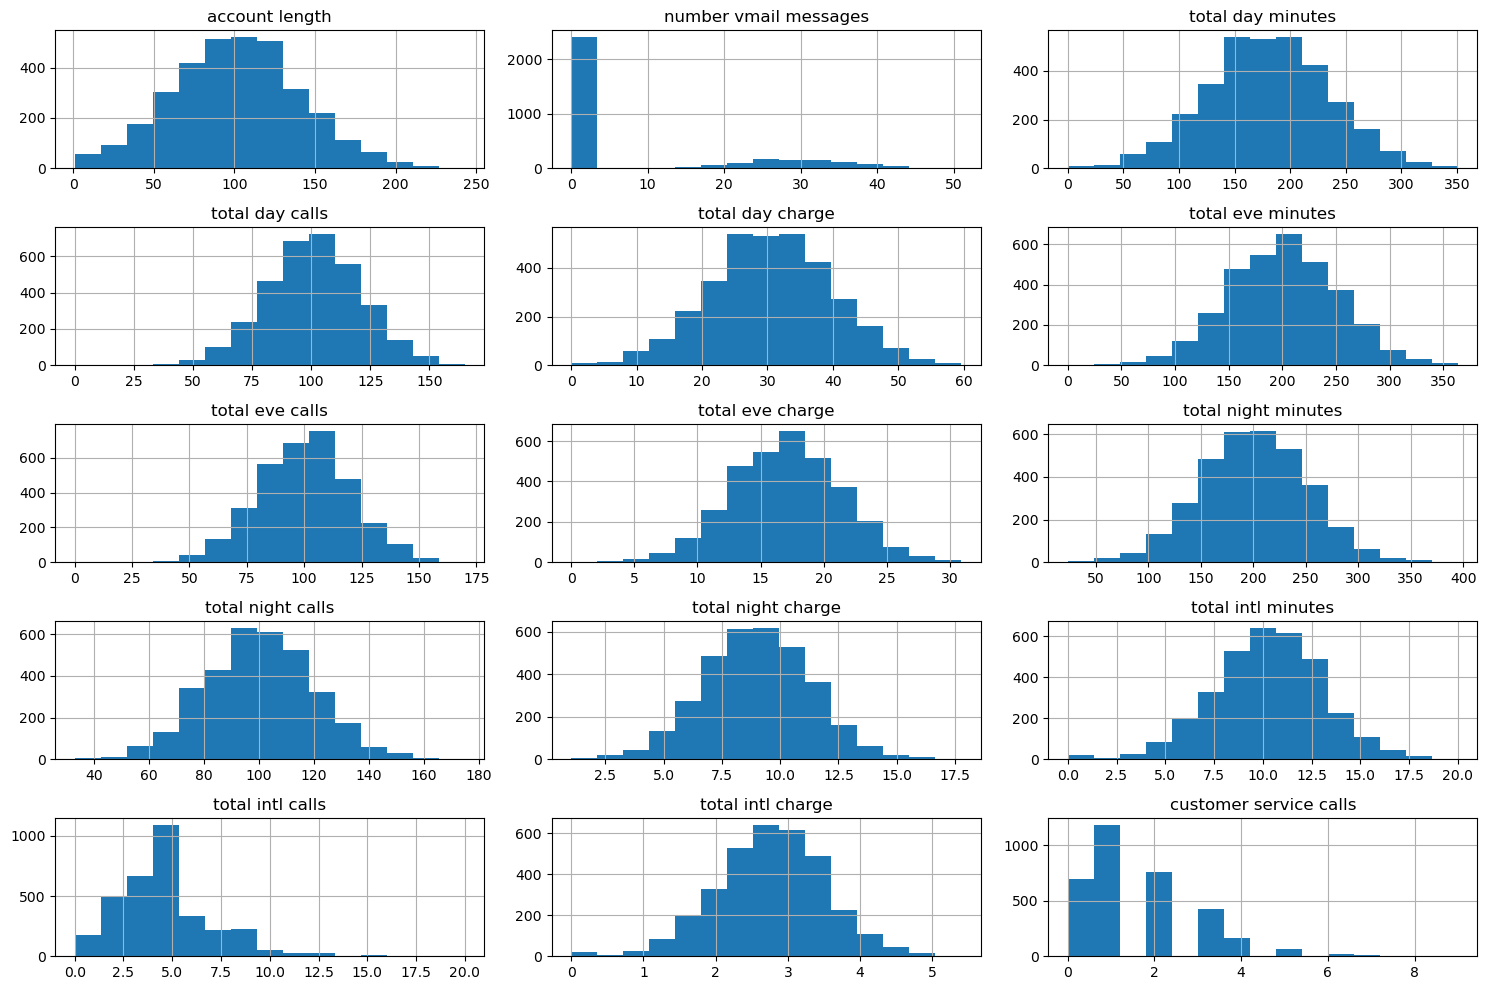

In [58]:
univariate_analysis = UnivariateAnalysis(churm_data.data)
numerical_columns =[
    'account length','number vmail messages','total day minutes','total day calls',
    'total day charge','total eve minutes','total eve calls','total eve charge',
    'total night minutes','total night calls','total night charge','total intl minutes',
    'total intl calls','total intl charge','customer service calls'
]

univariate_analysis.plot_histograms(numerical_columns)


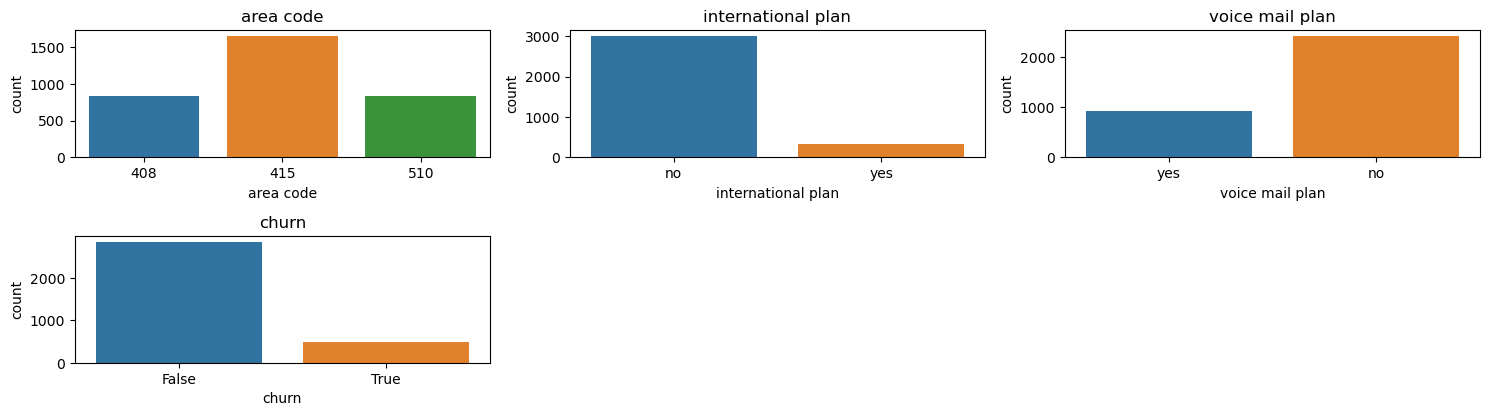

In [59]:

# Plotting bar plots for categorical columns
categorical_columns = [ 'area code', 'international plan', 'voice mail plan', 'churn']
univariate_analysis.plot_barplots(categorical_columns)

In [60]:
class BivariateAnalysis:
    def __init__(self, churm_data):
        self.data = churm_data
    
    def plot_scatter(self, x_column, y_column):
        """Plots a scatter plot for two specified columns."""
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.data[x_column], y=self.data[y_column])
        plt.title(f'Scatter Plot of {x_column} vs {y_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.show()
    
    def plot_correlation_heatmap(self):
        """Plots a correlation heatmap for the dataset."""
        plt.figure(figsize=(12, 10))
        correlation_matrix = self.data.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Heatmap')
        plt.show()
    
    def box_plot(self, x_column, y_column):
        sns.boxplot(x=self.data[x_column], y=self.data[y_column])
        plt.title('Distribution of Account Length for Churned and Non-Churned Customers')
        plt.xlabel('Churn')
        plt.ylabel('Account Length')
        plt.show()

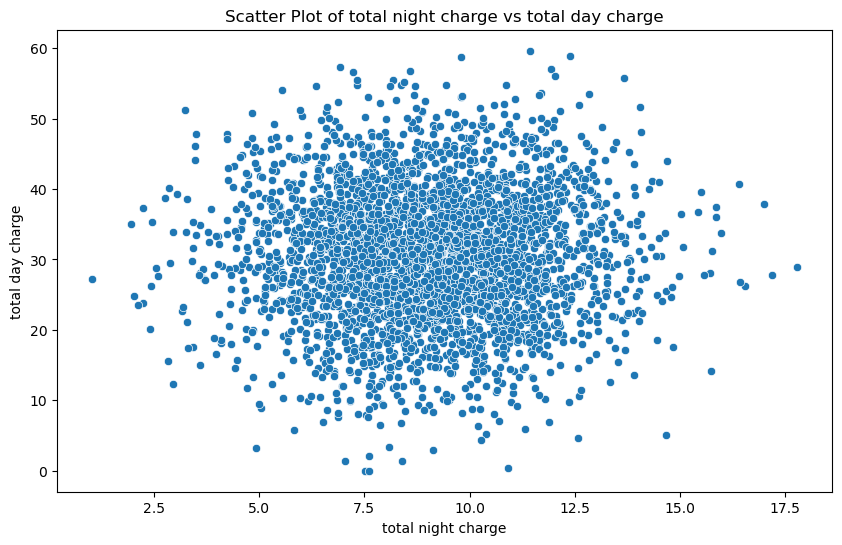

In [61]:
bivariate_analysis = BivariateAnalysis(churm_data.data)

# Plotting scatter plots for selected pairs of columns
bivariate_analysis.plot_scatter('total night charge', 'total day charge')
#bivariate_analysis.plot_scatter('total eve minutes', 'total eve charge')

# Plotting correlation heatmap
#bivariate_analysis.plot_correlation_heatmap()

# Plotting pair plots for a subset of columns
#bivariate_analysis.plot_pairplot(numerical_columns[:5])

churn
False    2850
True      483
Name: count, dtype: int64


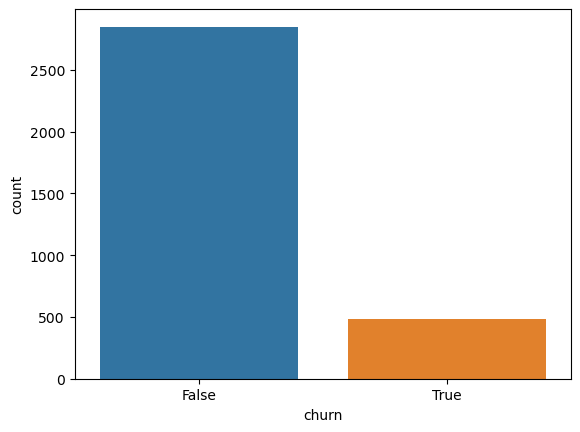

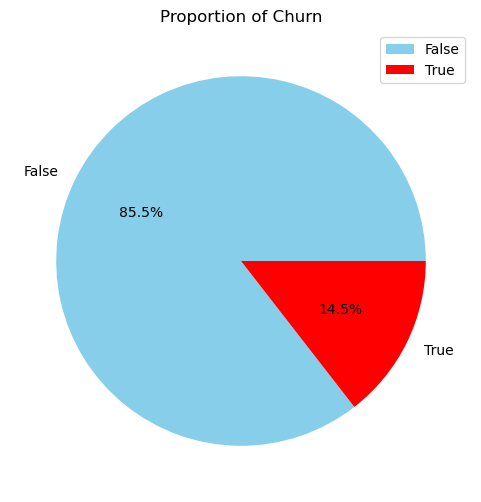

In [62]:
churn_counts = df['churn'].value_counts()
print(churn_counts)

# Plotting the distribution of churn
sns.countplot(data=df, x='churn')

# Plotting the distribution of churn using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue', 'red'])
plt.title('Proportion of Churn')
plt.legend(labels=['False', 'True'], loc='upper right')
plt.show()

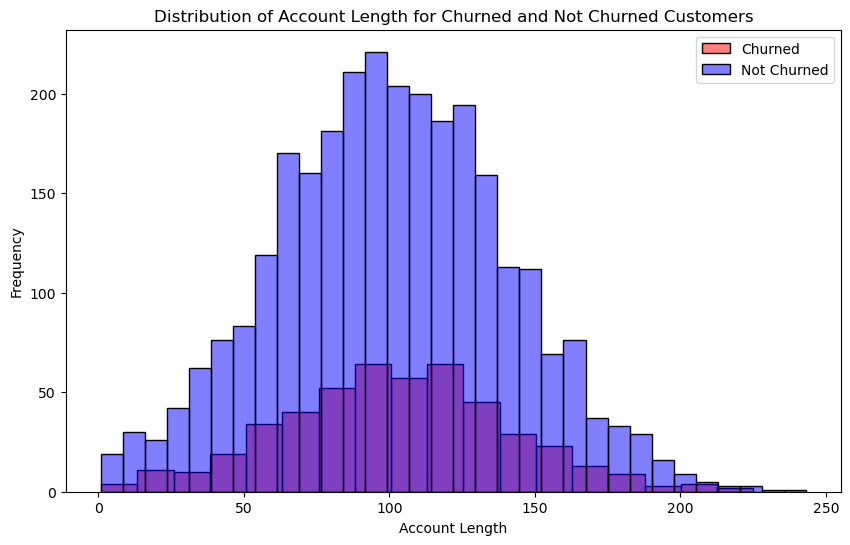

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter churned and not churned customers
churned_customers = churm_data.data[churm_data.data['churn'] == True]
not_churned_customers = churm_data.data[churm_data.data['churn'] == False]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['account length'], color='red', alpha=0.5, label='Churned')
sns.histplot(not_churned_customers['account length'], color='blue', alpha=0.5, label='Not Churned')
plt.title('Distribution of Account Length for Churned and Not Churned Customers')
plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [64]:
print(churm_data.data.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


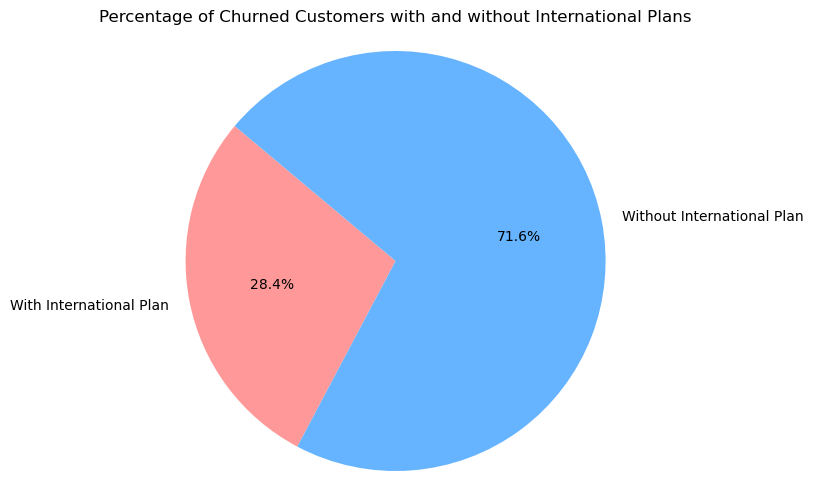

In [65]:
import matplotlib.pyplot as plt

# Calculate the number of churned customers with and without international plans
churned_with_international = churm_data.data[churm_data.data['churn'] & (churm_data.data['international plan'] == 'yes')].shape[0]
churned_without_international = churm_data.data[churm_data.data['churn'] & (churm_data.data['international plan'] == 'no')].shape[0]

# Calculate the total number of churned customers
total_churned = churm_data.data[churm_data.data['churn']].shape[0]

# Calculate the percentages
percent_with_international = (churned_with_international / total_churned) * 100
percent_without_international = (churned_without_international / total_churned) * 100

# Plotting the pie chart
labels = ['With International Plan', 'Without International Plan']
sizes = [percent_with_international, percent_without_international]
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Churned Customers with and without International Plans')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


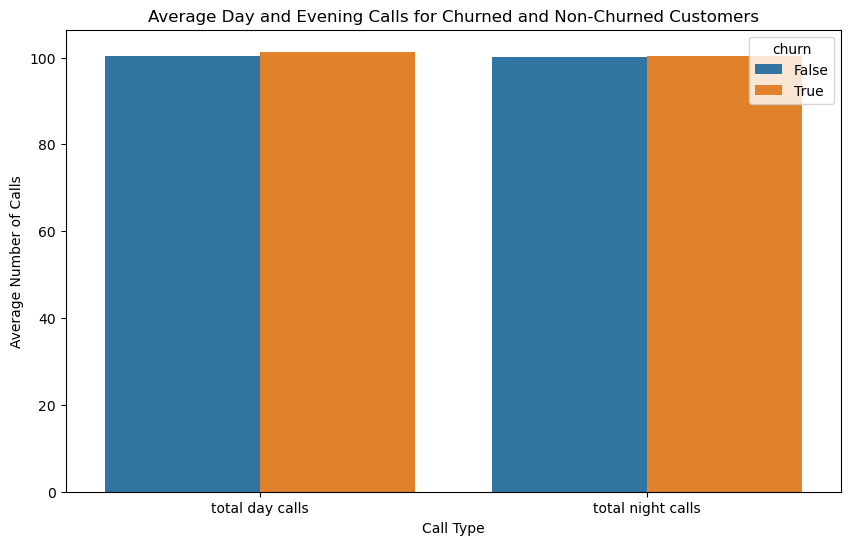

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
churm_data = pd.read_csv('Churmdata.csv')

# Ensure 'churn' column is of type category or string
churm_data['churn'] = churm_data['churn'].astype(str)

# Calculate the average number of day and evening calls for churned and non-churned customers
avg_calls = churm_data.groupby('churn')[['total day calls', 'total night calls']].mean().reset_index()

# Melt the dataframe to long format
avg_calls_melted = avg_calls.melt(id_vars='churn', var_name='Call Type', value_name='Average Calls')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Call Type', y='Average Calls', hue='churn', data=avg_calls_melted)
plt.title('Average Day and Evening Calls for Churned and Non-Churned Customers')
plt.xlabel('Call Type')
plt.ylabel('Average Number of Calls')
plt.show()


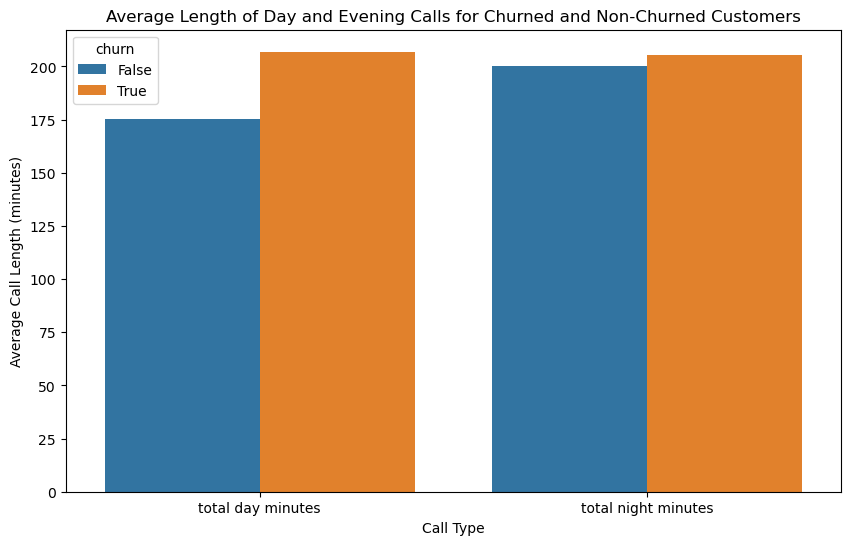

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
churm_data = pd.read_csv('Churmdata.csv')

# Ensure 'churn' column is of type category or string
churm_data['churn'] = churm_data['churn'].astype(str)

# Calculate the average length of day and evening calls for churned and non-churned customers
avg_call_length = churm_data.groupby('churn')[['total day minutes', 'total night minutes']].mean().reset_index()

# Melt the dataframe to long format
avg_call_length_melted = avg_call_length.melt(id_vars='churn', var_name='Call Type', value_name='Average Call Length')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Call Type', y='Average Call Length', hue='churn', data=avg_call_length_melted)
plt.title('Average Length of Day and Evening Calls for Churned and Non-Churned Customers')
plt.xlabel('Call Type')
plt.ylabel('Average Call Length (minutes)')
plt.show()


#  Multivariate analysis

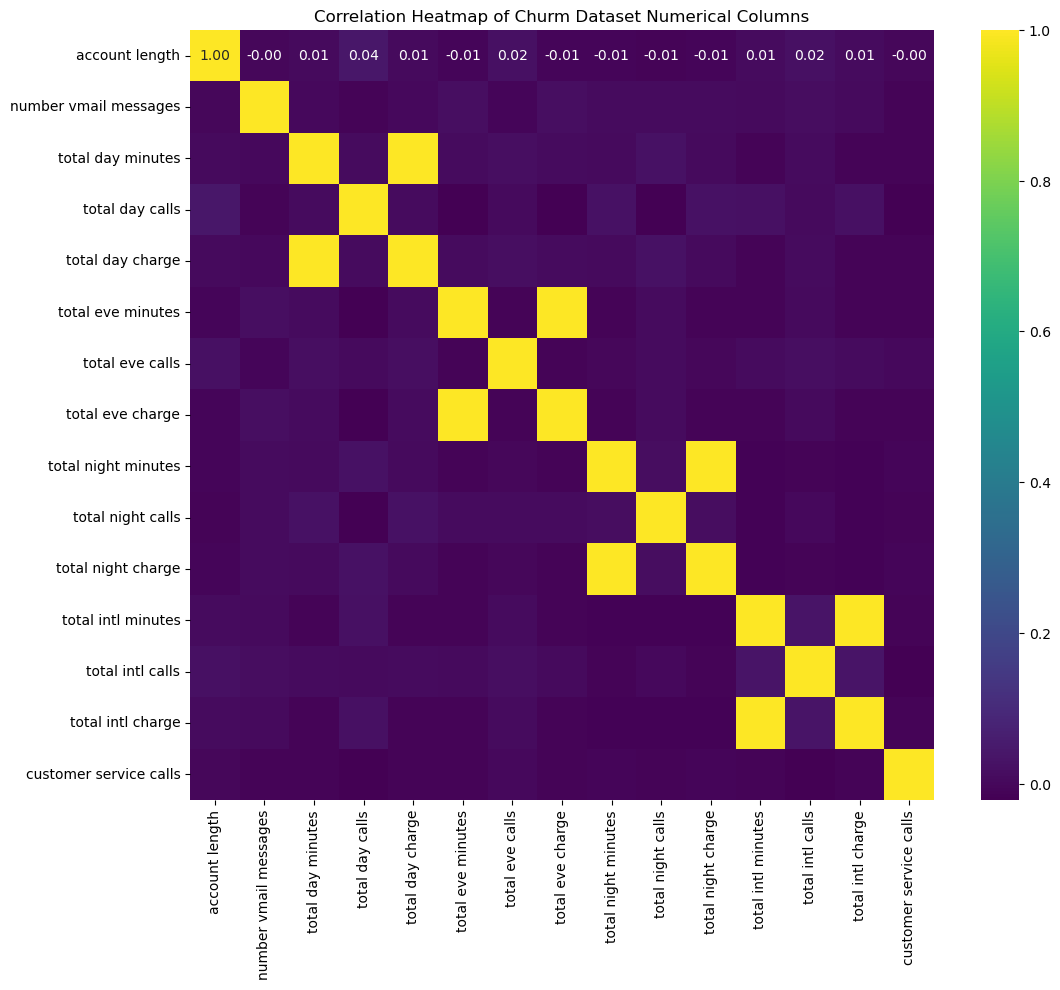

In [68]:

df =pd.read_csv('Churmdata.csv')
# Assuming you have your churn dataset loaded into a DataFrame called 'churmdata'
# You can load it with pd.read_csv('filename.csv') if it's in CSV format

# Assuming 'churmdata' is your DataFrame
numerical_columns = [
    'account length','number vmail messages','total day minutes','total day calls',
    'total day charge','total eve minutes','total eve calls','total eve charge',
    'total night minutes','total night calls','total night charge','total intl minutes',
    'total intl calls','total intl charge','customer service calls'
]

# Creating a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Churm Dataset Numerical Columns')
plt.show()


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming summary_data contains the summary columns
# Calculate VIF for each summary column
summary_columns = [
        'account length', 'number vmail messages', 'total day minutes', 
        'total day calls', 'total day charge', 'total eve minutes', 
        'total eve calls', 'total eve charge', 'total night minutes', 
        'total night calls', 'total night charge', 'total intl minutes', 
        'total intl calls', 'total intl charge', 'customer service calls'
    ]
vif_data = summary_columns
vif_data["Variable"] = summary_columns
vif_data["VIF"] = [variance_inflation_factor(summary_columns, i) for i in range(len(summary_columns))]

# Display VIF dataframe
print("Variance Inflation Factors (VIF):")
print(vif_data)


TypeError: list indices must be integers or slices, not str

# Preprocessing.

BASE MODEL = Logistic Regression

In [113]:
df = pd.read_csv('Churmdata.csv')

In [114]:
# Converting churn column into categories
df['churn'] = df['churn'].astype('int8')
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int8

In [115]:
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [116]:
#  drop the state column
df = df.drop(columns=['phone number'], axis=1)

In [117]:
df = df.drop(columns=['state'], axis=1)
df = df.drop(columns=['area code'] ,axis=1)

In [118]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Modelling.

In [119]:
# Defining X and y variables
X= df.drop(columns=['churn'], axis=1)
y = df['churn']

In [120]:
# Performing a test split for the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [121]:
# using SMOTE to deal with class imbalance
smote = SMOTE()
#fit SMOTE to training data
X_train_bal,y_train_bal= smote.fit_resample(X_train,y_train)

In [130]:
print(len(X_train_bal),  len(y_train_bal),len(X_test),len(y_test) )

4514 4514 667 667


In [122]:
# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_bal.columns)
scaled_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,-0.173697,-0.327808,-0.484789,-0.526211,-0.556748,0.827664,-0.556896,-0.163715,-1.261790,-0.163169,-1.598073,0.596970,-1.597560,-0.775594,-0.077884,-0.773602,0.232185
1,-1.295805,-0.327808,2.062752,2.005587,-0.807687,-1.219933,-0.807446,-0.252683,-0.183372,-0.251558,1.052857,-0.647007,1.051328,0.220731,-0.077884,0.219986,-0.483230
2,-0.956563,-0.327808,2.062752,1.842245,-0.543541,0.197635,-0.543300,2.301688,-1.046106,2.302417,0.133924,-0.214319,0.133863,-0.583993,0.768248,-0.589079,-0.483230
3,-1.034850,-0.327808,-0.484789,-0.526211,-1.728895,-0.852415,-1.729044,0.650837,-0.075530,0.650939,0.735254,-1.133780,0.736097,0.795534,-1.347082,0.801945,0.232185
4,2.305381,-0.327808,-0.484789,-0.526211,-0.794479,-0.222385,-0.794822,-0.551220,-0.237293,-0.551615,-1.913559,0.921486,-1.912792,-1.465358,-0.077884,-1.469114,-1.198644


In [124]:

# Initialize and fit logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train_bal)

# Predict on the testing set
y_pred = logistic_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7256371814092953


In [125]:
cv_scores = cross_val_score(logistic_reg, X_train_scaled, y_train_bal, cv=5, )
cv_scores

array([0.74307863, 0.74972315, 0.74640089, 0.7530454 , 0.70399113])

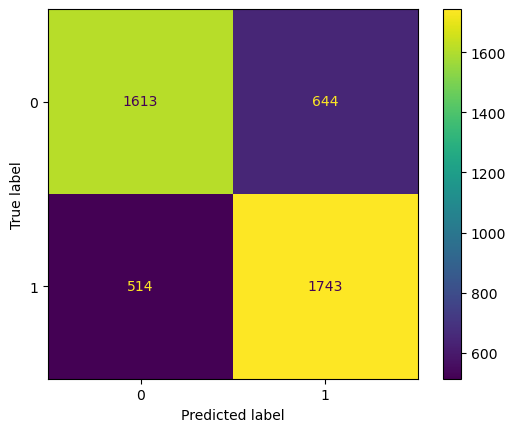

In [126]:
ConfusionMatrixDisplay.from_estimator(estimator=logistic_reg, X=X_train_scaled, y=y_train_bal);

In [127]:
cross_validate(logistic_reg, X_train_scaled, y_train_bal, return_train_score=True)

{'fit_time': array([0.04280281, 0.03319836, 0.01184249, 0.0101676 , 0.01149154]),
 'score_time': array([0.        , 0.        , 0.00310326, 0.        , 0.00099564]),
 'test_score': array([0.74307863, 0.74972315, 0.74640089, 0.7530454 , 0.70399113]),
 'train_score': array([0.73691498, 0.74079202, 0.74605372, 0.74051509, 0.7530454 ])}

In [141]:
#checking for overfitting.
y_train_pred =  logistic_reg.predict(X_train_scaled)

train_mse = mean_squared_error(y_train_bal, y_train_pred)
test_mse = mean_squared_error(y_test, y_pred)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.2565352237483385
Test Mean Squared Error: 0.27436281859070466


There does not seem to be a big difference between the train and test MSE.No overfitting.

In [142]:
from sklearn.metrics import roc_curve, auc


# Calculate the probability scores of each point in the training set
y_train_score = logistic_reg.decision_function(X_train_scaled)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train_bal,y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = logistic_reg.decision_function(X_test_scaled)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_score)

AUC: 0.8076677315039569


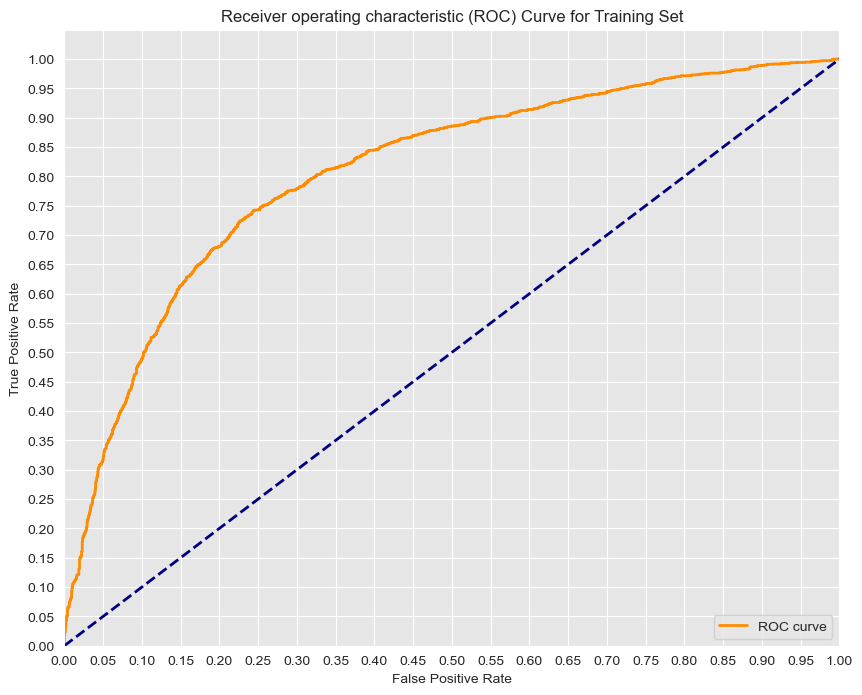

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

Test AUC: 0.7914862586026161



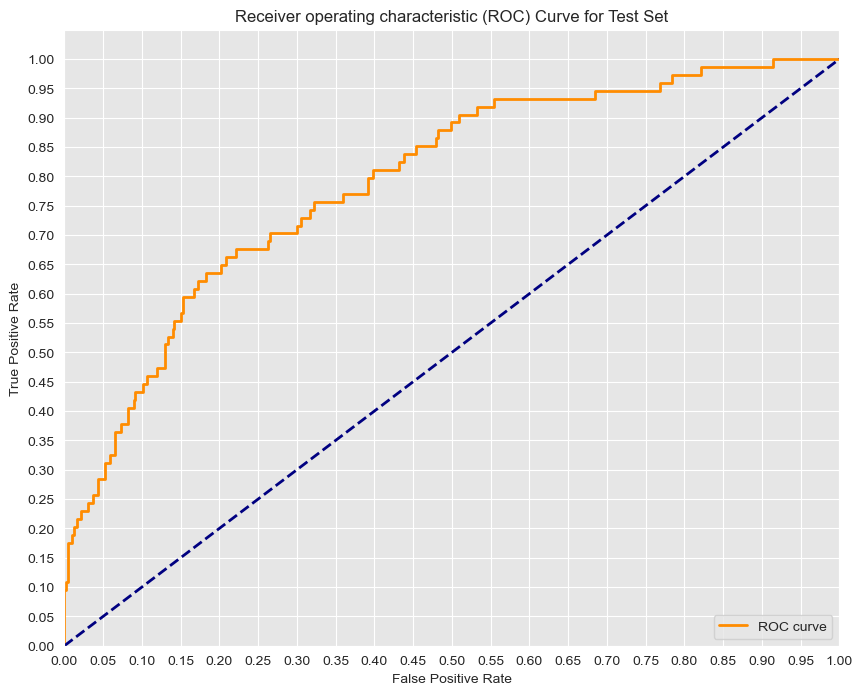

In [145]:

# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()

# Second model - KNN MODEL

In [165]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf =  KNeighborsClassifier()


# Fit the classifier
clf.fit(X_train_scaled,y_train_bal)

# Predict on the test set
test_preds = clf.predict(X_test_scaled)

In [170]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels,preds)))
    print("Recall Score: {}".format(recall_score(labels,preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels,preds)))
    print("F1 Score: {}".format(f1_score(labels,preds)))
    
print_metrics(y_test,y_pred)


Precision Score: 0.4397163120567376
Recall Score: 0.8378378378378378
Accuracy Score: 0.863568215892054
F1 Score: 0.5767441860465116


# MODEL 3-Decision Tree

In [159]:
Classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=10)
Classifier.fit(X_train_scaled,y_train_bal)


DecisionTreeClassifier(criterion='entropy', random_state=10)

In [160]:
y_pred = Classifier.predict(X_test_scaled)

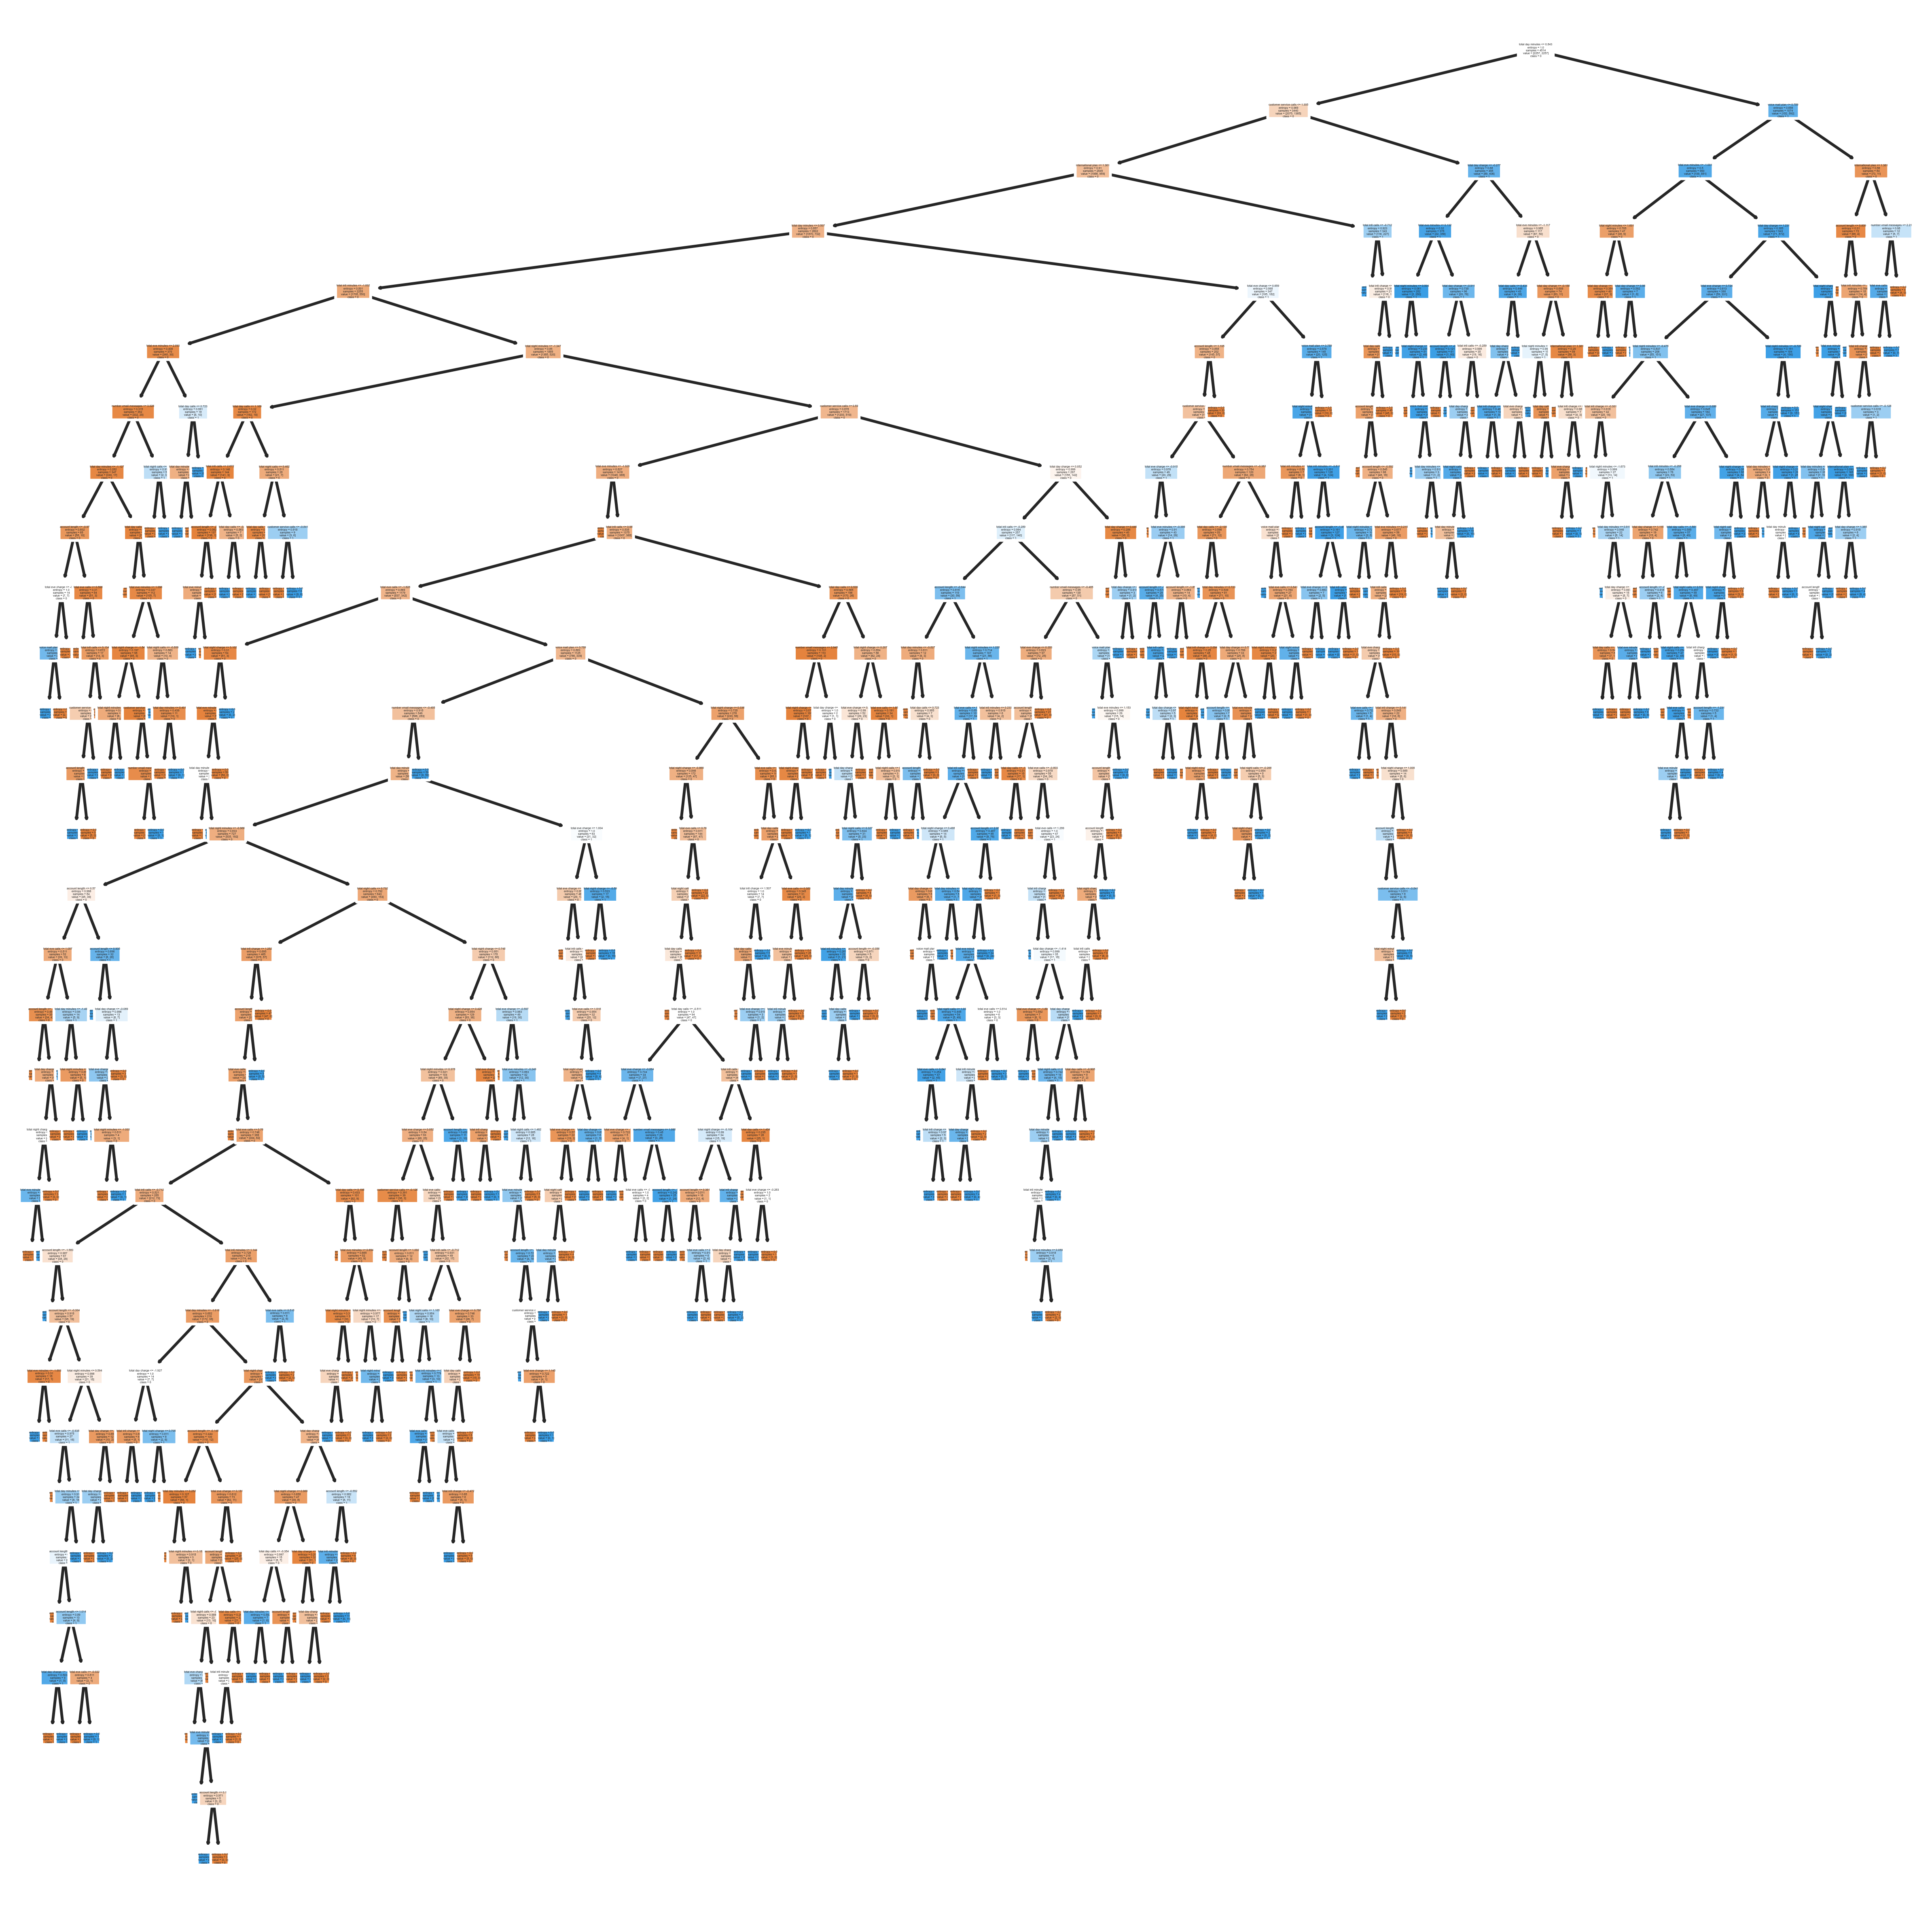

In [161]:
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(Classifier, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [162]:
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy is :86.3568215892054

AUC is :0.85

Confusion Matrix
----------------


Predicted,0,1,All
Actual,,,
0,514,79,593
1,12,62,74
All,526,141,667


In [164]:
report = classification_report(y_test, y_pred, )
print(report)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       593
           1       0.44      0.84      0.58        74

    accuracy                           0.86       667
   macro avg       0.71      0.85      0.75       667
weighted avg       0.92      0.86      0.88       667

